In [26]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [27]:
import cv2
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [28]:
image=get_image('provacolor3.png')
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [29]:

from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 50)
labels = clf.fit_predict(modified_image)

[array([96.0025, 96.0025, 96.0025]),
 array([61.57535264, 61.57535264, 61.57535264]),
 array([138.4917426, 138.4917426, 138.4917426]),
 array([120.02362449, 120.02362449, 120.02362449]),
 array([171.9067711, 171.9067711, 171.9067711]),
 array([140.99185862, 140.99185862, 140.99185862]),
 array([39.56112224, 39.56112224, 39.56112224]),
 array([31.12182741, 31.12182741, 31.12182741]),
 array([130.96295284, 130.96295284, 130.96295284]),
 array([136.4783432, 136.4783432, 136.4783432]),
 array([101.50406872, 101.50406872, 101.50406872]),
 array([184.91922354, 184.91922354, 184.91922354]),
 array([69.01766836, 69.01766836, 69.01766836]),
 array([106.98279473, 106.98279473, 106.98279473]),
 array([123.02103064, 123.02103064, 123.02103064]),
 array([152.49723183, 152.49723183, 152.49723183]),
 array([74.98326917, 74.98326917, 74.98326917]),
 array([42.98508159, 42.98508159, 42.98508159]),
 array([99.01955496, 99.01955496, 99.01955496]),
 array([89.98307774, 89.98307774, 89.98307774]),
 array([

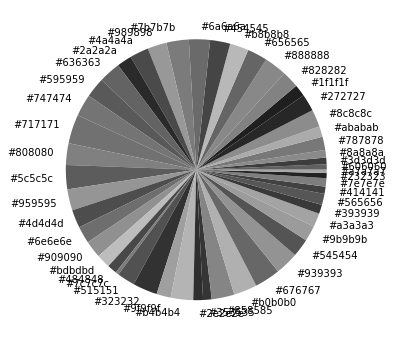

In [30]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

rgb_colors


In [31]:
import numpy as np
colorsorted=np.sort(rgb_colors,axis=None)
colorsorted

array([ 31.12182741,  31.12182741,  31.12182741,  35.77866137,
        35.77866137,  35.77866137,  39.56112224,  39.56112224,
        39.56112224,  42.98508159,  42.98508159,  42.98508159,
        46.53871849,  46.53871849,  46.53871849,  50.00517943,
        50.00517943,  50.00517943,  53.55765456,  53.55765456,
        53.55765456,  57.52955185,  57.52955185,  57.52955185,
        61.57535264,  61.57535264,  61.57535264,  65.59377452,
        65.59377452,  65.59377452,  69.01766836,  69.01766836,
        69.01766836,  72.00461295,  72.00461295,  72.00461295,
        74.98326917,  74.98326917,  74.98326917,  77.99175041,
        77.99175041,  77.99175041,  81.00255183,  81.00255183,
        81.00255183,  84.0077259 ,  84.0077259 ,  84.0077259 ,
        86.99378778,  86.99378778,  86.99378778,  89.98307774,
        89.98307774,  89.98307774,  92.99910953,  92.99910953,
        92.99910953,  96.0025    ,  96.0025    ,  96.0025    ,
        99.01955496,  99.01955496,  99.01955496, 101.50

In [32]:
import PIL.Image as Image
import numpy as np

im = Image.open('provacolor3.png')
im = im.convert('RGBA')

data = np.array(im)   # "data" is a height x width x 4 numpy array
red, green, blue, alpha = data.T # Temporarily unpack the bands for readability
i=0
# Replace white with red... (leaves alpha values alone...)
while i < 89:
    print(colorsorted[i])
    print(colorsorted[i+1])
    print(colorsorted[i+2])
    print('ciao')


    white_areas = (red == int(colorsorted[i])) & (blue == int(colorsorted[i + 1])) & (green == int(colorsorted[i + 2]))
    data[..., :-1][white_areas.T] = (255, 0, 0)  # Transpose back needed
    i = i + 2

im2 = Image.fromarray(data)
im2.show()

31.121827411167715
31.121827411167715
31.121827411167715
ciao
31.121827411167715
35.77866136514278
35.77866136514278
ciao
35.77866136514278
35.77866136514278
39.5611222444893
ciao
39.5611222444893
39.5611222444893
39.5611222444893
ciao
39.5611222444893
42.98508158508179
42.98508158508179
ciao
42.98508158508179
42.98508158508179
46.538718493775
ciao
46.538718493775
46.538718493775
46.538718493775
ciao
46.538718493775
50.00517943026287
50.00517943026287
ciao
50.00517943026287
50.00517943026287
53.55765456329771
ciao
53.55765456329771
53.55765456329771
53.55765456329771
ciao
53.55765456329771
57.52955185105038
57.52955185105038
ciao
57.52955185105038
57.52955185105038
61.575352635486645
ciao
61.575352635486645
61.575352635486645
61.575352635486645
ciao
61.575352635486645
65.59377452262663
65.59377452262663
ciao
65.59377452262663
65.59377452262663
69.01766835626398
ciao
69.01766835626398
69.01766835626398
69.01766835626398
ciao
69.01766835626398
72.0046129450775
72.0046129450775
ciao
72.00

In [33]:

im2 = Image.fromarray(data)
im2.show()